In [154]:
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("colorblind", 8)


In [155]:
df = pd.read_excel('../data/planilha tb pleural 2.xls').replace([99], [None])

# Separação entre TB e Não-TB

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

df.Diagnostico.value_counts().plot(kind='pie',
                                   autopct='%1.1f%%', 
                                   explode=[.1, .1, 0, 0],
                                   startangle=45,
                                   ax=ax)



In [157]:
df.drop(df[df['Diagnostico'] == 'IG'].index, inplace=True)

df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.to_excel('../data/planilha tb pleural - no_ignored.xlsx')

In [158]:
df

Nome data nasc idade sexo est civil estuda  \
0                  Gilson Eli  16.09.70    40    1         1      2   
1                  Heverton O  21.10.78    32    1         1      2   
2                  Ivo de Sou  01.06.51    56    1         1      2   
3                  José Perei  30.06.47    60    1         1      2   
4                  Luiz Carlo  10.10.63    44    1         1      2   
5                  José Lanes       NaN    75    1         2      2   
6                  Jorge Mont  05.02.56    52    1         2      2   
7                  Marcio Sal  26.01.74    34    1         1      2   
8                  Leandro Di  22.12.67    38    1         1      2   
9                  Nilton Nog  05.05.63    44    1         1      1   
10                 José Alves  16.05.68    39    1         2      2   
11                 Agostinho   22.06.73    36    1         2      2   
12                 Élia da Si  27.11.71    38    2         1      2   
13                 Robinson W  24.05.04    26    1         1      2   
14                 Jose Franc  20.05.48    63    1         2      2   
15                 Magno da S  14.09.79    28    1         2      2   
16                 Murilo Mor  08.03.90    18    1         1      2   
17                 Rafael Sir  25.02.74    30    1         1      2   
18                 Ronaldo Pi  31.10.65    45    1         1      2   
19                 Agostinho   28.02.52    56    1         2      2   
20                 Juraci Sen  10.07.37    69    1         2      2   
21                 Jessica Ma  10.08.87    21    2         1      1   
22                 Anselmo He  23.04.48    57    1      None   None   
23                 Geiliane M  15.11.85    25    2         1      2   
24                 Joao Batis  23.06.58    50    1         2      2   
25                 Jose Juven  18.12.27    81    1         2      2   
26                 Lucas Pais  30.06.89    18    1         1      2   
27                 Jorge Evar  14.06.56    51    1         1      1   
28                 Luzinete A  17.01.68    41    2         2      2   
29                 Alracy Jos  17.01.36    73    1         2      2   
..                        ...       ...   ...  ...       ...    ...   
42               João Antonio  10.02.52    56    1         2      2   
43                 Carlos Oso  25.07.68    39    1         1      2   
44                 Casimiro R  11.03.47    62    1         2      2   
45                 Adenilson   17.03.82    25    1         1      2   
46                 Sebastião   04.03.20    89    1         1      2   
47                 Roberto Mo  07.04.61    47    1         1      2   
48                 Enilson do  19.11.36    74    1         1      2   
49                Paulo Cesar  03.01.49    62    1         2      2   
50                 Felipe Alf  23.04.78    32    1         1      2   
51                 Edmilson d  31.12.57    53    1         1      2   
52                 Jorge de A  21.04.68    42    1         1      2   
53                 Arnaldo Si  18.07.47    63    1         2      2   
54                 Paulo Cesa  10.02.42    69    1         2      2   
55                 Claudia Re  11.08.62    48    2         1      2   
56       Francisco das Chagas  10.11.76    37    1         2      2   
57        Daniel da Conceiçao       NaN    28    1         3      2   
58              Pedro Barbosa       NaN    56    1         3      2   
59  Damião Bernardo de Moraes       NaN    71    1         3      2   
60  Roberto da Silva carreira       NaN    53    1         3      2   
61            João Paulo Lima       NaN    24    1         3      2   
62              Creiton Frank       NaN    22    1         1   None   
63            Emerson Santana       NaN    26    1         2      1   
64          Orivaldo Bernardo       NaN    45    1         3      2   
65           Bianor Agostinho       NaN    34    1      None      2   
66                Cesar David       NaN    33    

# Descrição do banco de dados

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.pie(df.sexo.value_counts(),
        explode=[.1, 0],
        labels=['Masculino', 'Feminino'],
        autopct='%1.1f%%',
        shadow=False,
        startangle=90);

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
df.idade.plot(kind='kde', ax=ax)
ax.set_ylabel('Quantidade')
ax.set_xlabel('Idade')
ax.axvline(x=df.idade.mean(), ls=':', c='r')
ax.set_title('Distribuição de idades');
ax.text(df.idade.mean() + 1, 0.01, '%.2f' % df.idade.mean(),
        fontsize=20,
        bbox=dict(facecolor='red', alpha=0.5))
sns.despine(left=True)


## Variáveis usadas

- Dados Pessoais
   - idade 
   - sexo
   - est civil
   - estuda
   - escolari
   - emprego
   - hcw
   - trabalho
   - renda
   - rendaant
   - instchef
  
  
- Dados Sociais  
   - asppo
   - carro
   - banheiro
   - freezer
   - geladeira
   - gel
   - maquina
   - radio
   - tv
   - vídeo
   - pessoas
   - comodos
   - dorm
   - morua
   - preso

In [129]:
personal_data_columns = [
   "idade",
   "sexo",
   "est civil",
   "estuda",
   "escolaridade",
   "emprego",
   "hcw",
   "trabalho",
   "renda",
   "renda ant",
   "inst chef"
]

social_data_columns = [
    "asp pó ", 
    "carro ", 
    "banheiro",
    "freezer",
    "geladeira ",
    "gel",
    "maquina",
    "radio",
    "tv",
    "video",
    "pessoas",
    "comodos",
    "dorm",
    "mo rua",
    "preso"
]

In [130]:
database = df[personal_data_columns + social_data_columns].astype(float)

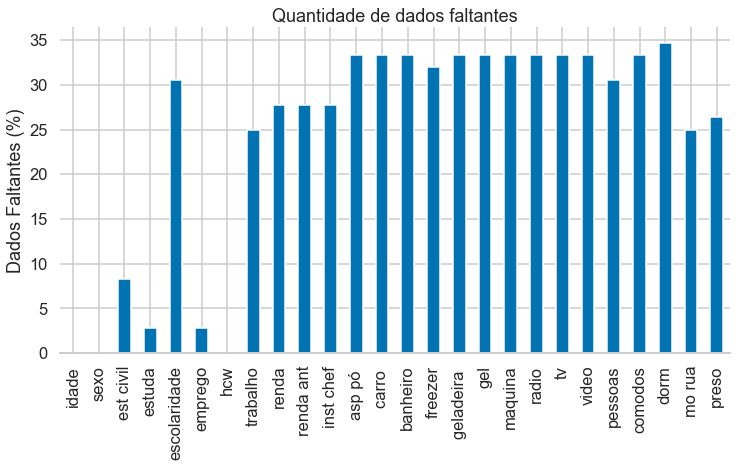

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = ((database.isnull().sum() / database.index.size) * 100).plot(kind='bar')
ax.set_title('Quantidade de dados faltantes')
ax.set_ylabel('Dados Faltantes (%)')
sns.despine(left=True)


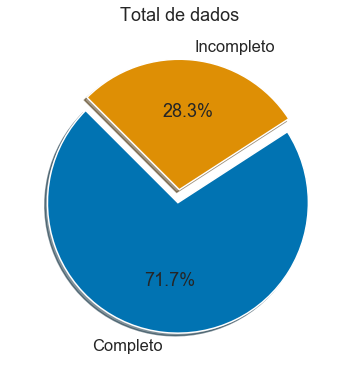

In [132]:
total_data = len(database.keys()) * 62
total_missing_data = sum(database.isnull().sum()) / total_data

fig, ax = plt.subplots(1, 1, figsize=(6,6))

ax.pie([1 - total_missing_data, total_missing_data],
        explode=[.1, 0],
        labels=['Completo', 'Incompleto'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=135);
ax.set_title('Total de dados');

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

n_rows_incomplete = (database.isnull().sum(axis=1) != 0).sum() / len(database.index)

ax.pie([1 - n_rows_incomplete, n_rows_incomplete],
        explode=[.1, 0],
        labels=['Completo', 'Incompleto'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=135);
ax.set_title('Percentual de pacientes que possuem pelo menos uma variável faltante');


In [134]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))

n_rows_incomplete = (database.isnull().sum(axis=0) != 0).sum() / len(database.columns)
ax.pie([n_rows_incomplete, 1 - n_rows_incomplete, ],
        explode=[.1, 0],
        labels=['Completo', 'Incompleto'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=135);
ax.set_title('Percentual de variáveis que estão incompletas\n para pelo menos um paciente');

# Imputação Mútua de dados

In [135]:
from statsmodels.imputation.mice import MICEData

In [136]:
imp = MICEData(database, k_pmm=5)

In [137]:
sns.set_style('ticks')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
imp.plot_missing_pattern(ax=ax, row_order='raw', color_row_patterns=False)
ha, la = ax.get_legend_handles_labels()
pad = 0.5
leg = fig.legend(ha, la,
                 handletextpad=pad)
ax.set_title('Padrões de dados faltantes')
ax.set_ylabel('Pacientes')
ax.set_xlabel(u'Variáveis')



Text(0.5, 0, 'Variáveis')

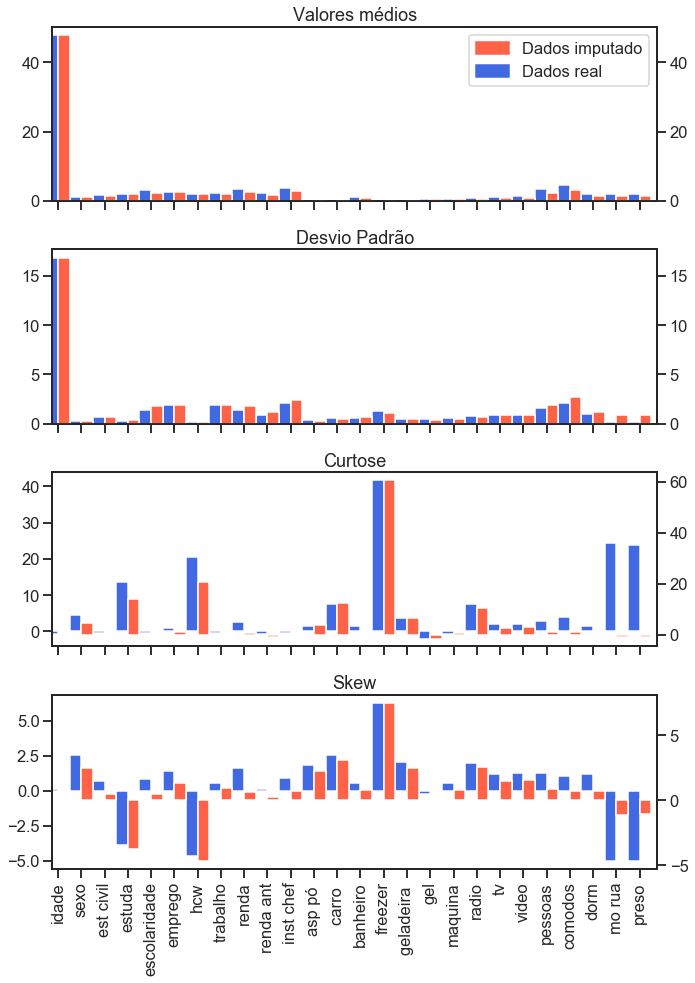

In [138]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(4, 1, figsize=(10, 14))

ax = axes[0]
database.mean().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.mean().plot(kind='bar', color='tomato', ax=ax2, position=0)
ax.set_title('Valores médios')

re = mpatches.Patch(color='tomato', label='Dados imputado')
im = mpatches.Patch(color='royalblue', label='Dados real')

plt.legend(handles=[re,im], loc=0)

ax = axes[1]
database.std().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.std().plot(kind='bar', color='tomato', ax=ax2, position=0)
ax.set_title('Desvio Padrão')

ax = axes[2]
ax.set_title('Curtose')

database.kurtosis().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.kurtosis().plot(kind='bar', color='tomato', ax=ax2, position=0)

ax = axes[3]
ax.set_title('Skew')

database.skew().plot(kind='bar',color='royalblue', ax=ax, position=1)
ax2 = ax.twinx() 
imp.data.skew().plot(kind='bar', color='tomato', ax=ax2, position=0)


fig.tight_layout()

In [139]:
closure = (df['Diagnostico'].isin(['P-TB', 'TB'])).map(lambda x: int(x) * 2. - 1 )

# Esferização dos dados

In [140]:
from sklearn.preprocessing import StandardScaler

data_normalized = StandardScaler().fit_transform(imp.data)

In [141]:
export_data = {}
df_normalized = pd.DataFrame(data_normalized,
                             columns=database.columns,
                             index=database.index)
export_data['normalized'] = df_normalized
export_data['output'] = closure

In [142]:
import _pickle as pkl

pkl.dump(export_data, open('data_preprocessed+social_personal.pickle', "wb"))

# Multi-factorial Analysis

In [143]:
import prince

In [144]:
mfa = prince.MFA(
    groups = {"Social": social_data_columns, "Personal": personal_data_columns},
    n_components=df_normalized.columns.values.shape[0],
    n_iter=100)
mfa = mfa.fit(df_normalized)

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(np.cumsum(mfa.explained_inertia_))
ax.set_title("Variance Explained")
ax.set_ylabel('Variance (%)')
ax.set_xlabel('Number of Components')
ax.grid()

sns.despine(left=True)


In [146]:

mfa = prince.MFA(
    groups = {"Social": social_data_columns, "Personal": personal_data_columns},
    n_components=10,
    n_iter=100,
    engine='auto'
)
mfa = mfa.fit(df_normalized)

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
var_corrs = mfa.column_correlations(df_normalized)
var_corrs = var_corrs.loc[sorted(personal_data_columns) + sorted(social_data_columns)]
cax = ax.matshow(var_corrs, cmap=plt.cm.RdBu_r)
plt.colorbar(cax)
ax.set_yticks(np.arange(len(var_corrs.index.values)))
ax.set_yticklabels(var_corrs.index.values)
ax.set_xticks(np.arange(len(var_corrs.columns.values)))

for tick in ax.yaxis.get_ticklabels():
    if tick.get_text() in social_data_columns:
        tick.set_color('darkolivegreen')
        tick.set_text(tick.get_text() + ' a')
    else:
        tick.set_color('darkorange')
        
sns.despine(left=True)


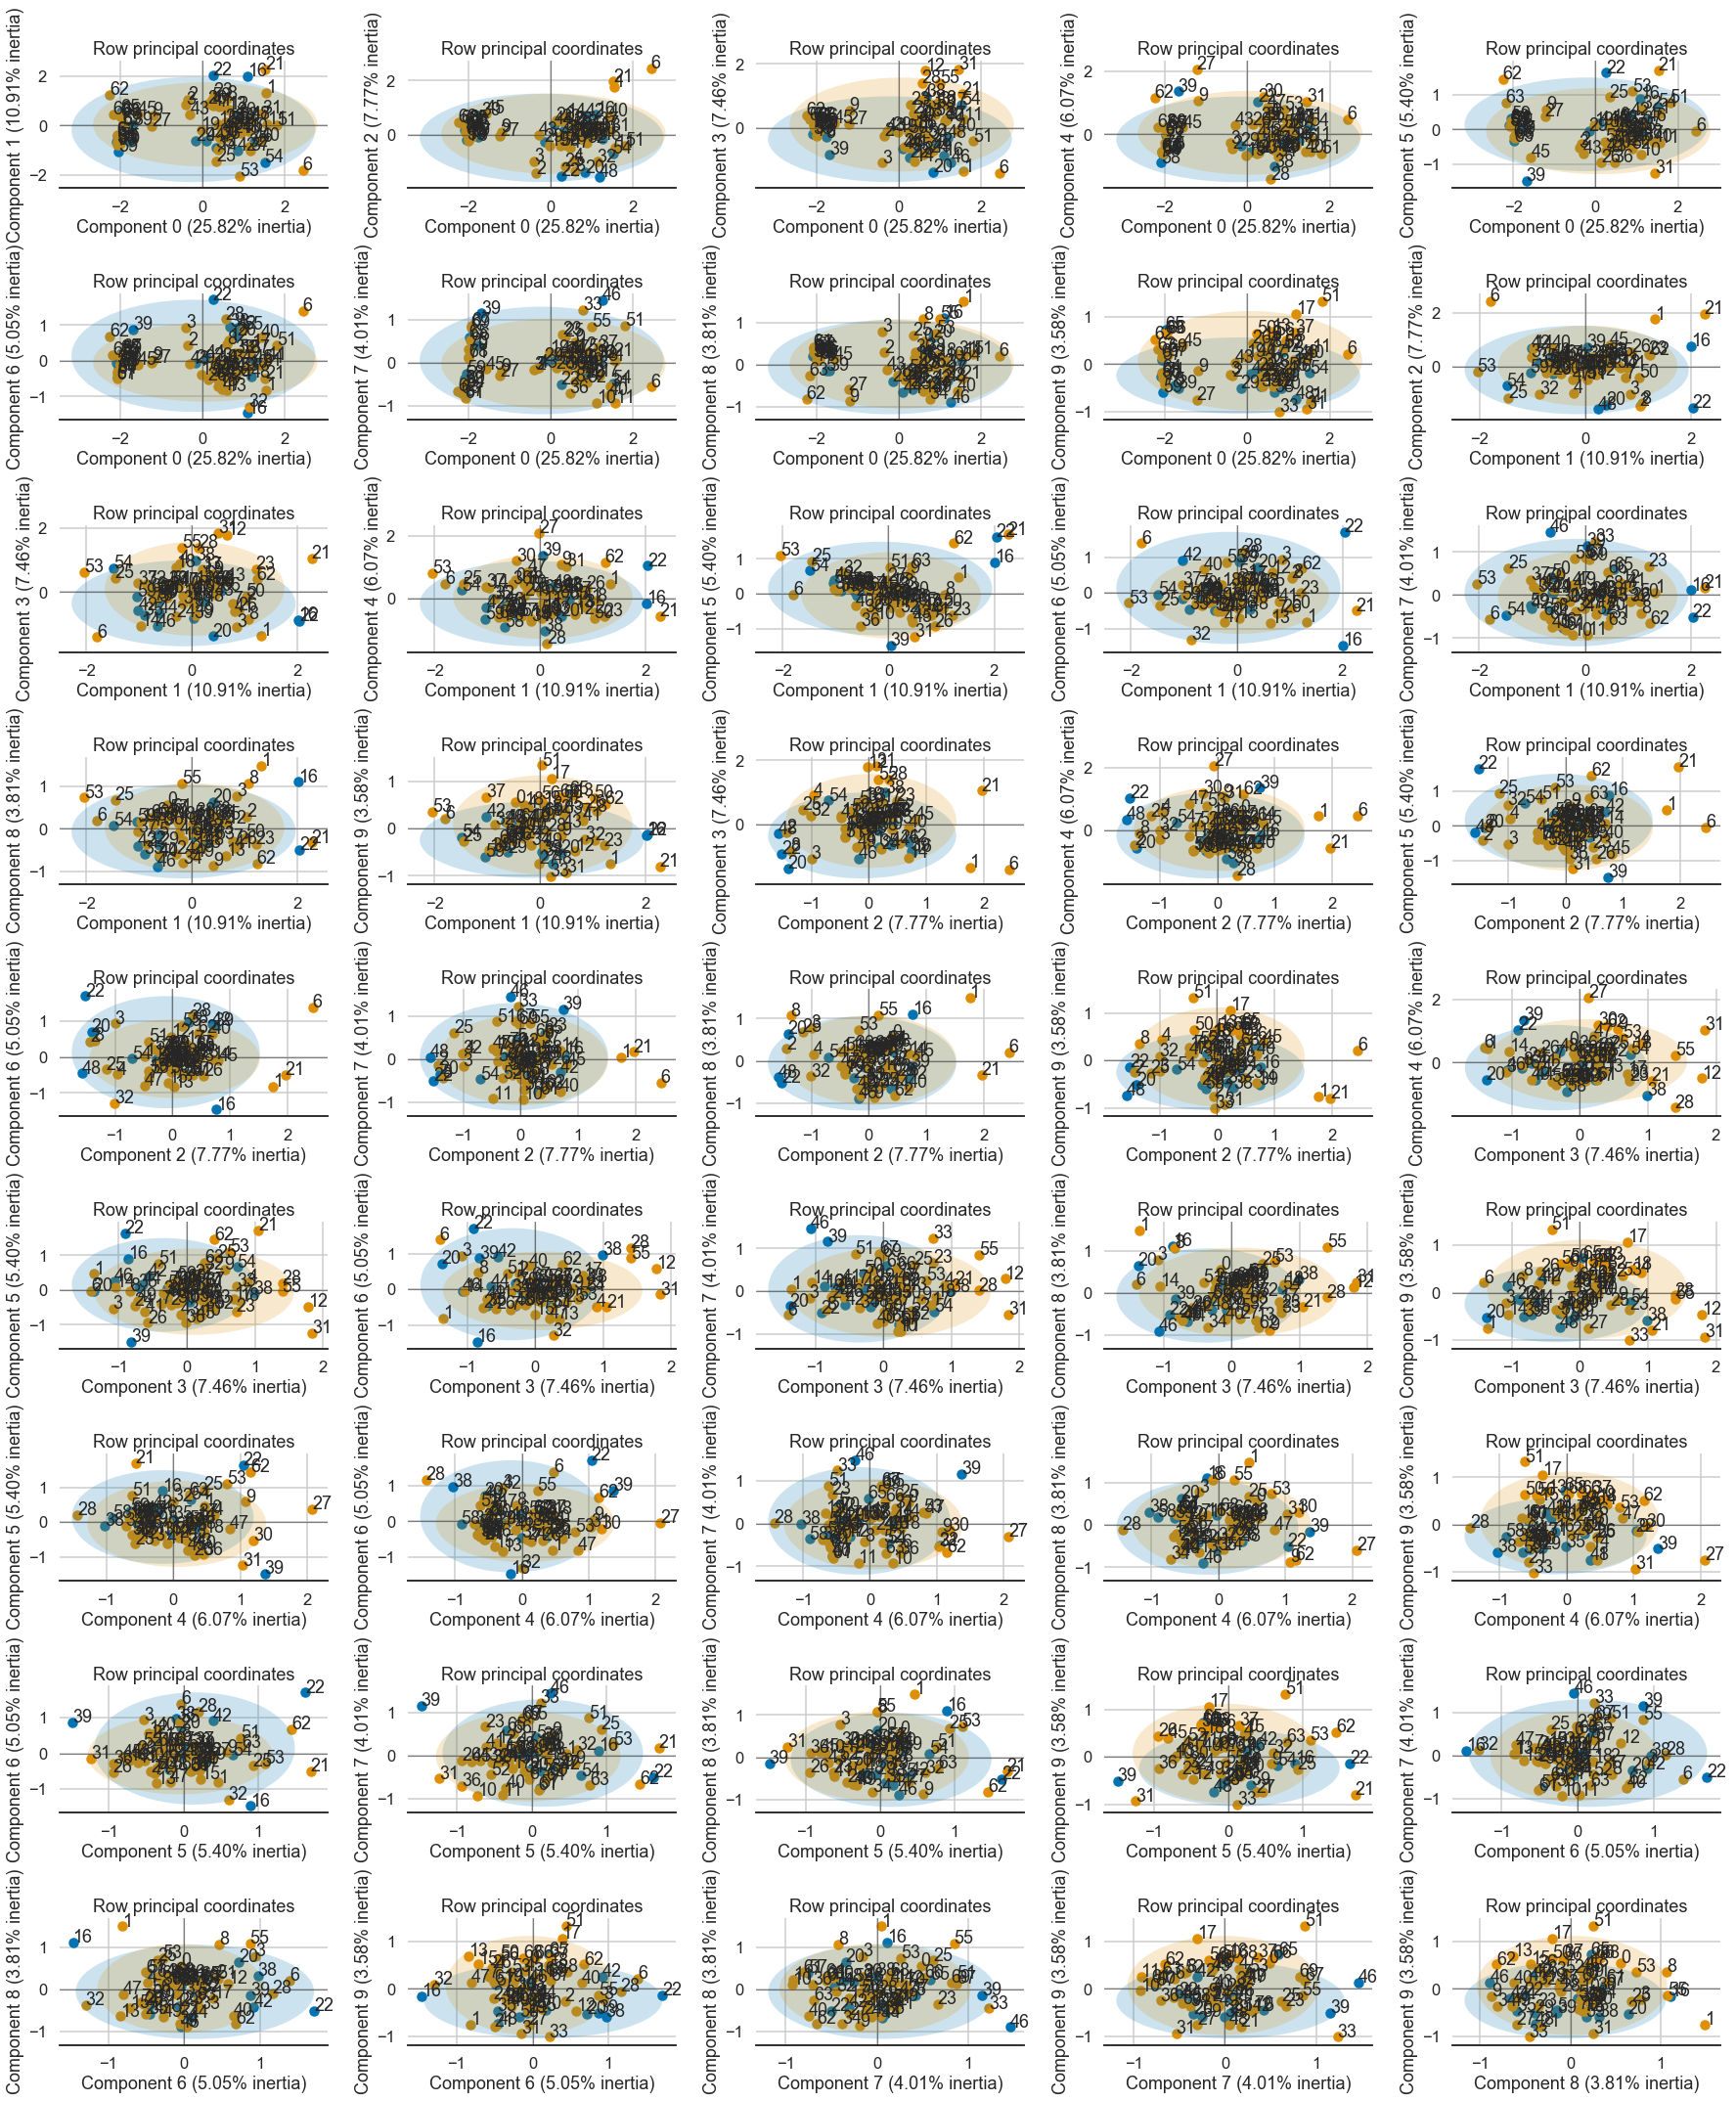

In [148]:
import itertools

fig, axes = plt.subplots(9, 5, figsize=(25, 30))
axes_flatten = axes.ravel()

for idx, comb in enumerate(itertools.combinations(range(10), 2)):
    mfa.plot_row_coordinates(
        df_normalized,
        ax=axes_flatten[idx],
        x_component=comb[0],
        y_component=comb[1],
        color_labels = [{-1: 'Non-TB', 1: 'TB'}[c] for c in closure],
        labels=imp.data.index,
        ellipse_outline=False,
        ellipse_fill=True,
        show_points=True)
    axes_flatten[idx].get_legend().remove()

    
fig.tight_layout()
sns.despine(left=True)


# Correlação entre variáveis

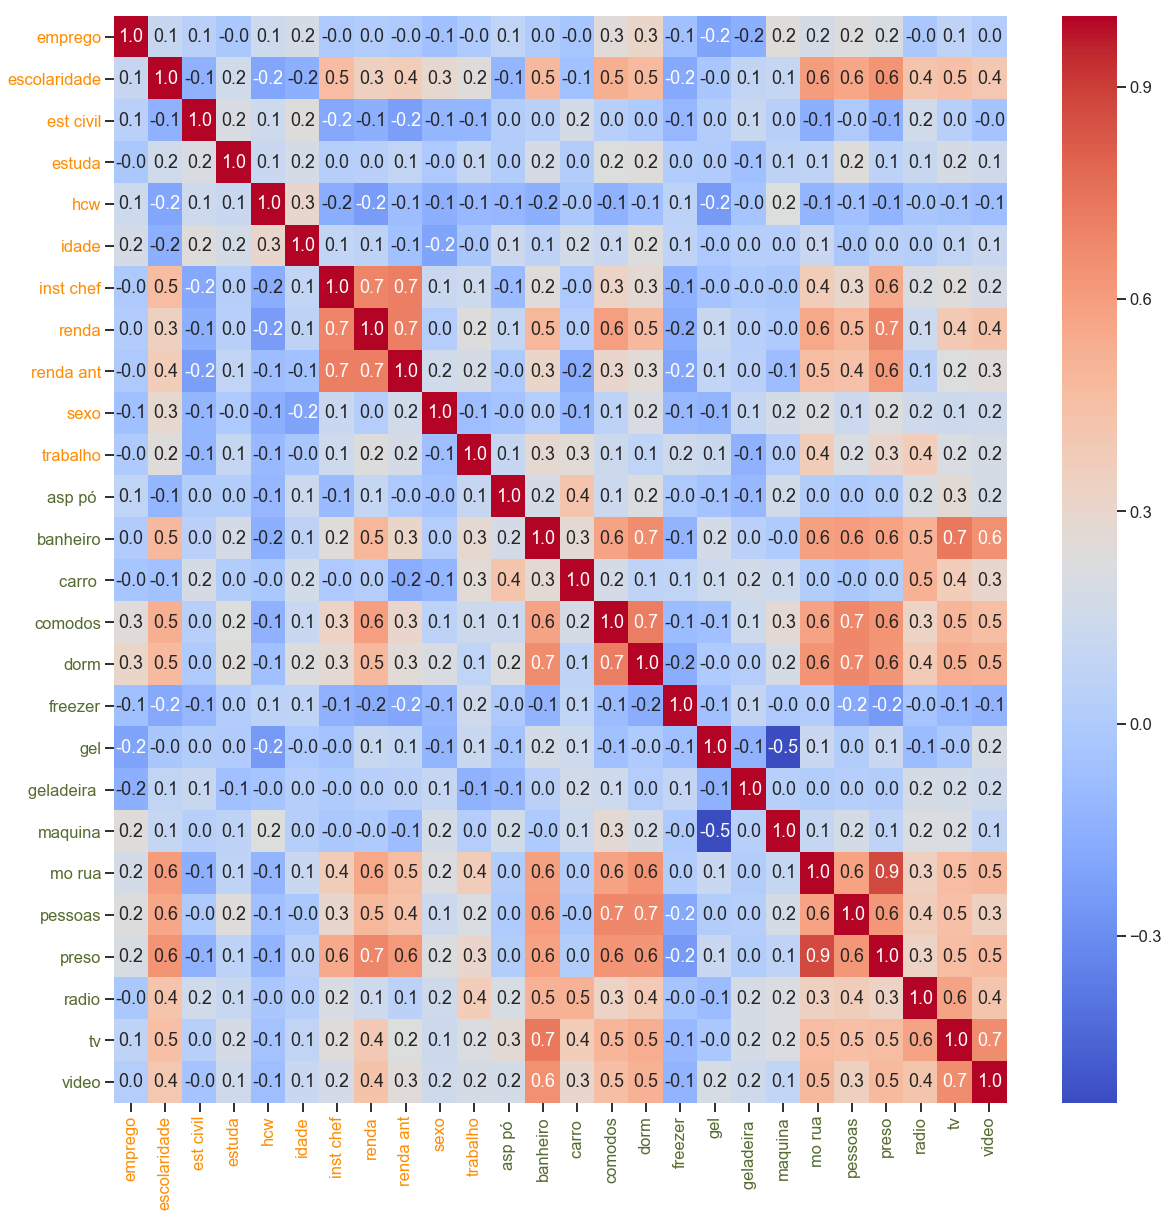

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(df_normalized[sorted(personal_data_columns) + sorted(social_data_columns)].corr(),
            ax=ax, annot=True,  cmap="coolwarm", fmt='.1f')
for tick in ax.yaxis.get_ticklabels():
    if tick.get_text() in social_data_columns:
        tick.set_color('darkolivegreen')
        tick.set_text(tick.get_text() + ' a')
    else:
        tick.set_color('darkorange')

for tick in ax.xaxis.get_ticklabels():
    if tick.get_text() in social_data_columns:
        tick.set_color('darkolivegreen')
    else:
        tick.set_color('darkorange')

In [150]:
from pyitlib import discrete_random_variable as drv

mi = drv.information_mutual_normalised

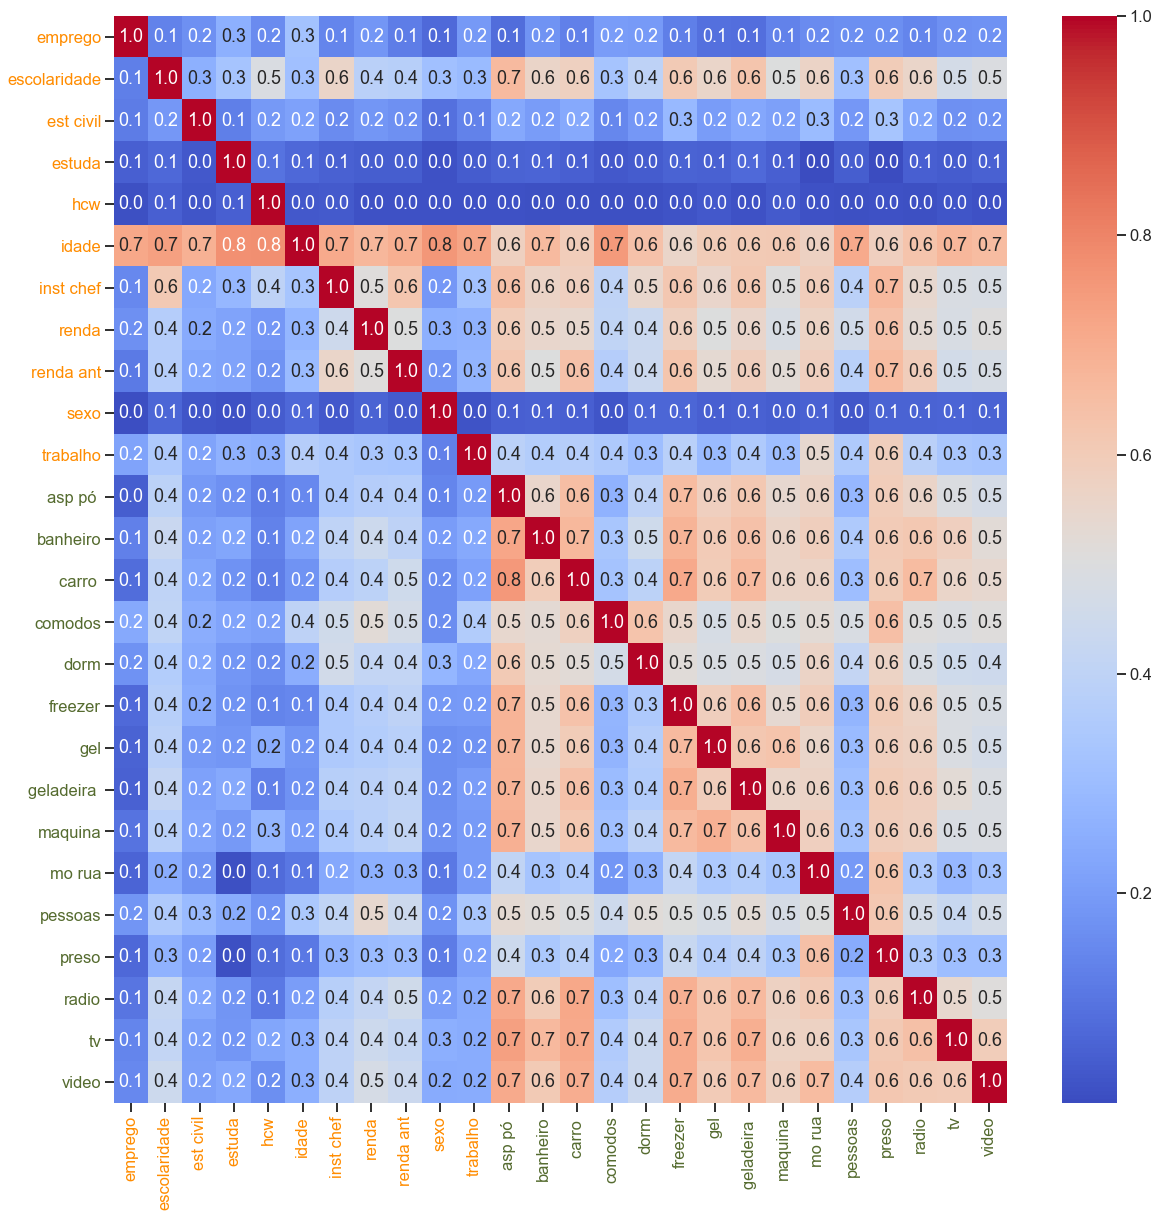

In [151]:
mi_data = df_normalized[sorted(personal_data_columns) + sorted(social_data_columns)]


fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(pd.DataFrame(mi(mi_data.T), index=mi_data.columns, columns=mi_data.columns),
            ax=ax, annot=True,  cmap="coolwarm", fmt='.1f')
for tick in ax.yaxis.get_ticklabels():
    if tick.get_text() in social_data_columns:
        tick.set_color('darkolivegreen')
        tick.set_text(tick.get_text() + ' a')
    else:
        tick.set_color('darkorange')

for tick in ax.xaxis.get_ticklabels():
    if tick.get_text() in social_data_columns:
        tick.set_color('darkolivegreen')
    else:
        tick.set_color('darkorange')

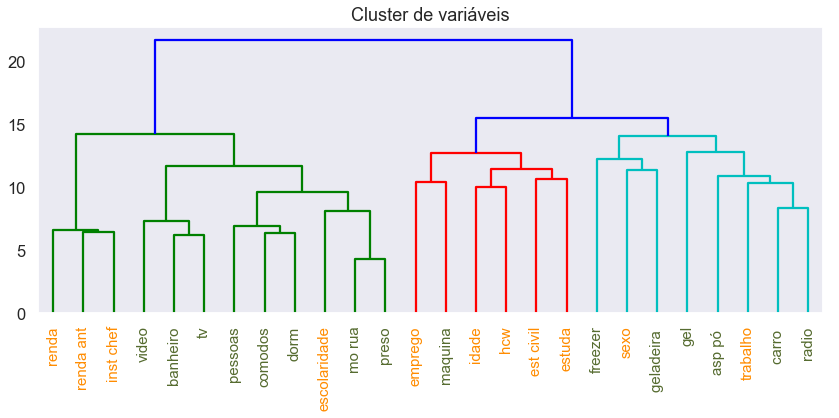

In [152]:
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set_style("dark")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
linkage_matrix = linkage(df_normalized.T, 'ward')
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
    ax=ax
);

varnames = df_normalized.columns.to_list()
ticklabels = [varnames[int(tick.get_text())] for tick in ax.xaxis.get_ticklabels()]
ax.set_xticklabels(ticklabels)
fig.tight_layout()

for tick in ax.xaxis.get_ticklabels():
    if tick.get_text() in social_data_columns:
        tick.set_color('darkolivegreen')
    else:
        tick.set_color('darkorange')
        
ax.set_title('Cluster de variáveis');



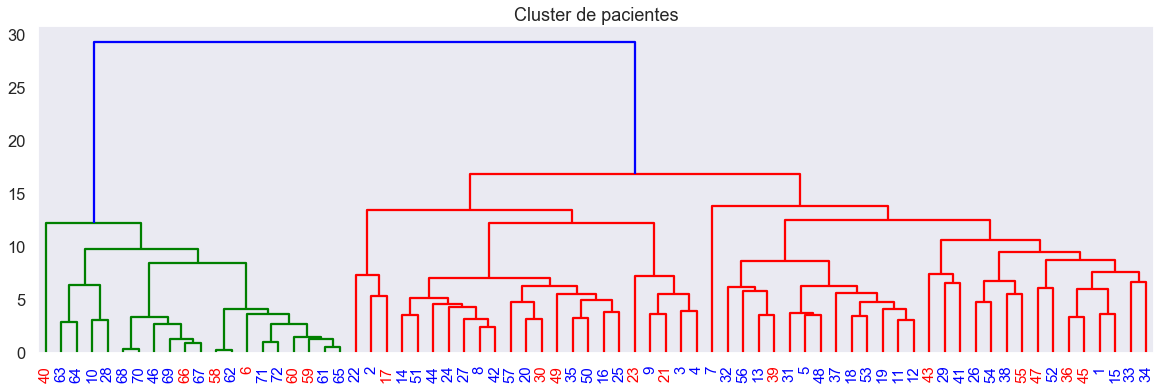

In [153]:
sns.set_style("dark")

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
linkage_matrix = linkage(df_normalized, 'ward')
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=15.,  # font size for the x axis labels
    ax=ax
);

for tick in ax.xaxis.get_ticklabels():
    if closure[int(tick.get_text())] < 0:
        tick.set_color('red')
    else:
        tick.set_color('blue')

# Natural counting
ticklabels = [int(tick.get_text()) +  1 for tick in ax.xaxis.get_ticklabels()]
ax.set_xticklabels(ticklabels)
        
ax.set_title('Cluster de pacientes');